### Day3-1 作業

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

#### 作法一

In [2]:
data = {
    '國家':['Taiwan','America','Japan','Thailand','Bhutan','Congo','Italy','Aruba'],
    '人口':np.random.randint(1000,500000,size=8) 
}
test = pd.DataFrame(data)

In [3]:
#人口數最多的國家
test.loc[test['人口'].idxmax()]

國家    Thailand
人口      498834
Name: 3, dtype: object

#### 作法二 (只留紀錄)

In [4]:
country = ['Taiwan','America','Japan','Thailand','Bhutan','Congo','Italy','Aruba']
#隨機產生8個數,介於1000~500000
population = np.random.randint(1000,500000,size=8) 

labels = ['國家','人口'] 
cols = [country,population] 
#串聯
data_2 = list(zip(labels, cols))
test_2 = pd.DataFrame(dict(data_2))

### Day3-2 作業   1.讀取 target_url ,將所提供的 txt 轉成 pandas dataframe

In [5]:
import requests

In [6]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
#確認是否連線成功
if response.status_code == requests.codes.ok:
    data = response.text

* 分割字串

In [7]:
data = data.split("\n")
arrange_data = []
for d in data:
    d=d.split("\t")
    arrange_data.append(d)

* 將 txt 轉成 pandas dataframe

In [8]:
df = pd.DataFrame(arrange_data)
df.columns = ["id","website"]
df.head()

,id,website
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


### Day3-2 作業   2.從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片(因網址有問題,目前確定farm1開頭不會錯,而17-21列有符合)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#可省略  plt.show()
from PIL import Image
from io import BytesIO

#### 練習紀錄(留)

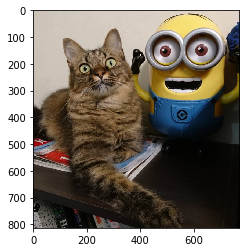

In [10]:
img2 = Image.open('../data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
#plt.show()

* 先做第一列網址的讀取

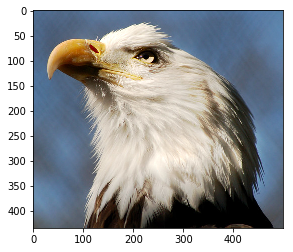

In [11]:
#取第一列資料網址
first_link = df.loc[0,"website"] 
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))
# Convert img to numpy array
img = np.array(img)
plt.imshow(img)
plt.show()

* 定義方法,傳入值為網址的list

In [12]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        print(url)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = np.array(img)
        img_list.append(img)
    return img_list

http://farm4.static.flickr.com/3271/2496428562_90b5cb82a6.jpg
http://farm2.static.flickr.com/1115/703274169_5ef9b9dfc9.jpg
http://farm1.static.flickr.com/70/200362625_938f8f06a7.jpg
http://farm1.static.flickr.com/180/370761991_7249dc2f90.jpg
http://farm3.static.flickr.com/2197/1659368303_4dbf9b312a.jpg
Total images that we got: 5 


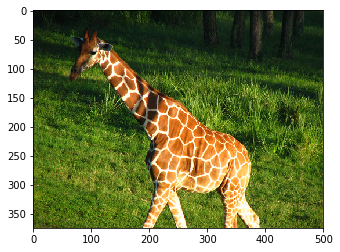

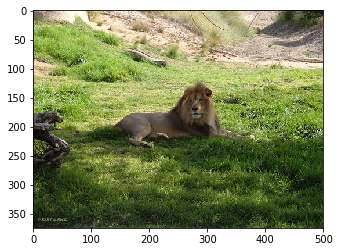

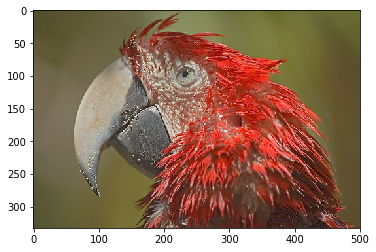

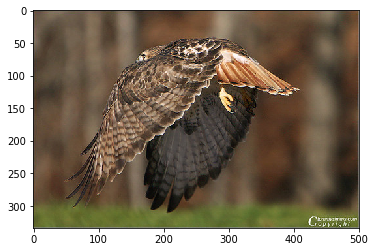

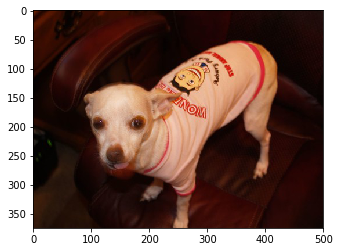

In [13]:
#farm1 開頭的網址才沒有錯
result = img2arr_fromURLs(df.iloc[16:21,1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()